# Extraction

## From https://coinmarketcap.com

In [1]:
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import csv

In [2]:
# Data since 2013/04/28 to 2020/06/07
today = datetime.date.today()
mktcap_page = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
page = urllib2.urlopen(mktcap_page)
soup = BeautifulSoup(page, 'html.parser')
table = soup.find("table")



In [3]:
## headings = [th.get_text().strip() for th in table.find("tr").find_all("td")]
headings = [th.get_text().strip() for th in table.find("tr").find_all("th")]
headings

['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap']

In [4]:
headings = [x.replace('*','') for x in headings]
headings

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [5]:
datasets = []

for row in soup.find_all("tr")[1:]:
    dataset = dict(zip(headings, (tr.get_text() for tr in row.find_all("td"))))
    if len(dataset) > 1:
        datasets.append(dataset)

datasets[0]

{'Date': 'Jul 13, 2020',
 'Open': '242.18',
 'High': '244.31',
 'Low': '238.23',
 'Close': '239.60',
 'Volume': '7,787,751,468',
 'Market Cap': '26,775,071,858'}

In [6]:
my_df = pd.DataFrame(datasets)
my_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 13, 2020",242.18,244.31,238.23,239.60,"7,787,751,468","26,775,071,858"
1,"Jul 12, 2020",239.46,243.31,237.77,242.13,"6,596,394,718","27,054,158,346"
2,"Jul 11, 2020",241.04,241.53,238.33,239.46,"5,643,067,316","26,752,161,985"
3,"Jul 10, 2020",242.87,242.88,236.73,240.98,"7,281,370,522","26,919,422,187"
4,"Jul 09, 2020",246.75,247.29,239.90,243.02,"8,429,099,199","27,143,016,879"


In [14]:
full_data = my_df.set_index('Date')
#full_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']]
full_data.to_csv('full_data_eth_13072020.csv', index=True, header=True)

In [8]:
full_data.head(10)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 13, 2020",242.18,244.31,238.23,239.60,"7,787,751,468","26,775,071,858"
"Jul 12, 2020",239.46,243.31,237.77,242.13,"6,596,394,718","27,054,158,346"
"Jul 11, 2020",241.04,241.53,238.33,239.46,"5,643,067,316","26,752,161,985"
"Jul 10, 2020",242.87,242.88,236.73,240.98,"7,281,370,522","26,919,422,187"
"Jul 09, 2020",246.75,247.29,239.90,243.02,"8,429,099,199","27,143,016,879"
"Jul 08, 2020",239.16,248.31,238.40,246.67,"9,892,586,411","27,547,785,703"
"Jul 07, 2020",240.97,242.68,234.22,239.08,"6,441,497,597","26,696,376,073"
"Jul 06, 2020",227.69,242.13,227.03,241.51,"8,782,917,553","26,964,937,043"
"Jul 05, 2020",228.98,229.86,224.54,227.66,"5,292,172,429","25,415,950,649"


In [9]:
full_data.shape

(1803, 6)

In [10]:
full_data.dtypes

Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [11]:
def obj_to_int(x):
    x = x.replace(',','')
    return float(x)
full_data['Close'] = full_data['Close'].apply(obj_to_int)
full_data['Open'] = full_data['Open'].apply(obj_to_int)
full_data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Jul 13, 2020",242.18,244.31,238.23,239.60,"7,787,751,468","26,775,071,858"
"Jul 12, 2020",239.46,243.31,237.77,242.13,"6,596,394,718","27,054,158,346"
"Jul 11, 2020",241.04,241.53,238.33,239.46,"5,643,067,316","26,752,161,985"
"Jul 10, 2020",242.87,242.88,236.73,240.98,"7,281,370,522","26,919,422,187"
"Jul 09, 2020",246.75,247.29,239.90,243.02,"8,429,099,199","27,143,016,879"


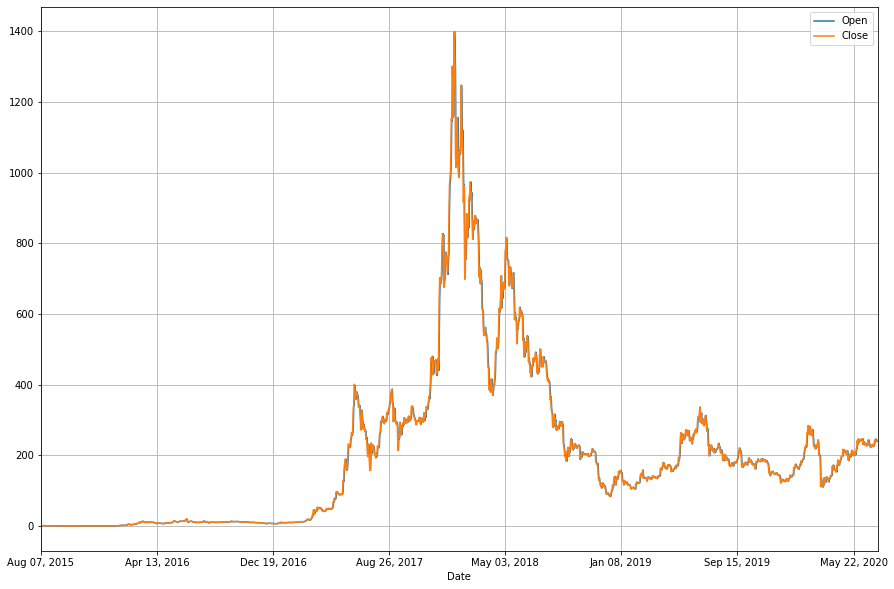

In [13]:
_= full_data[['Open','Close']][::-1].plot(grid=True, figsize=(15, 10))